In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

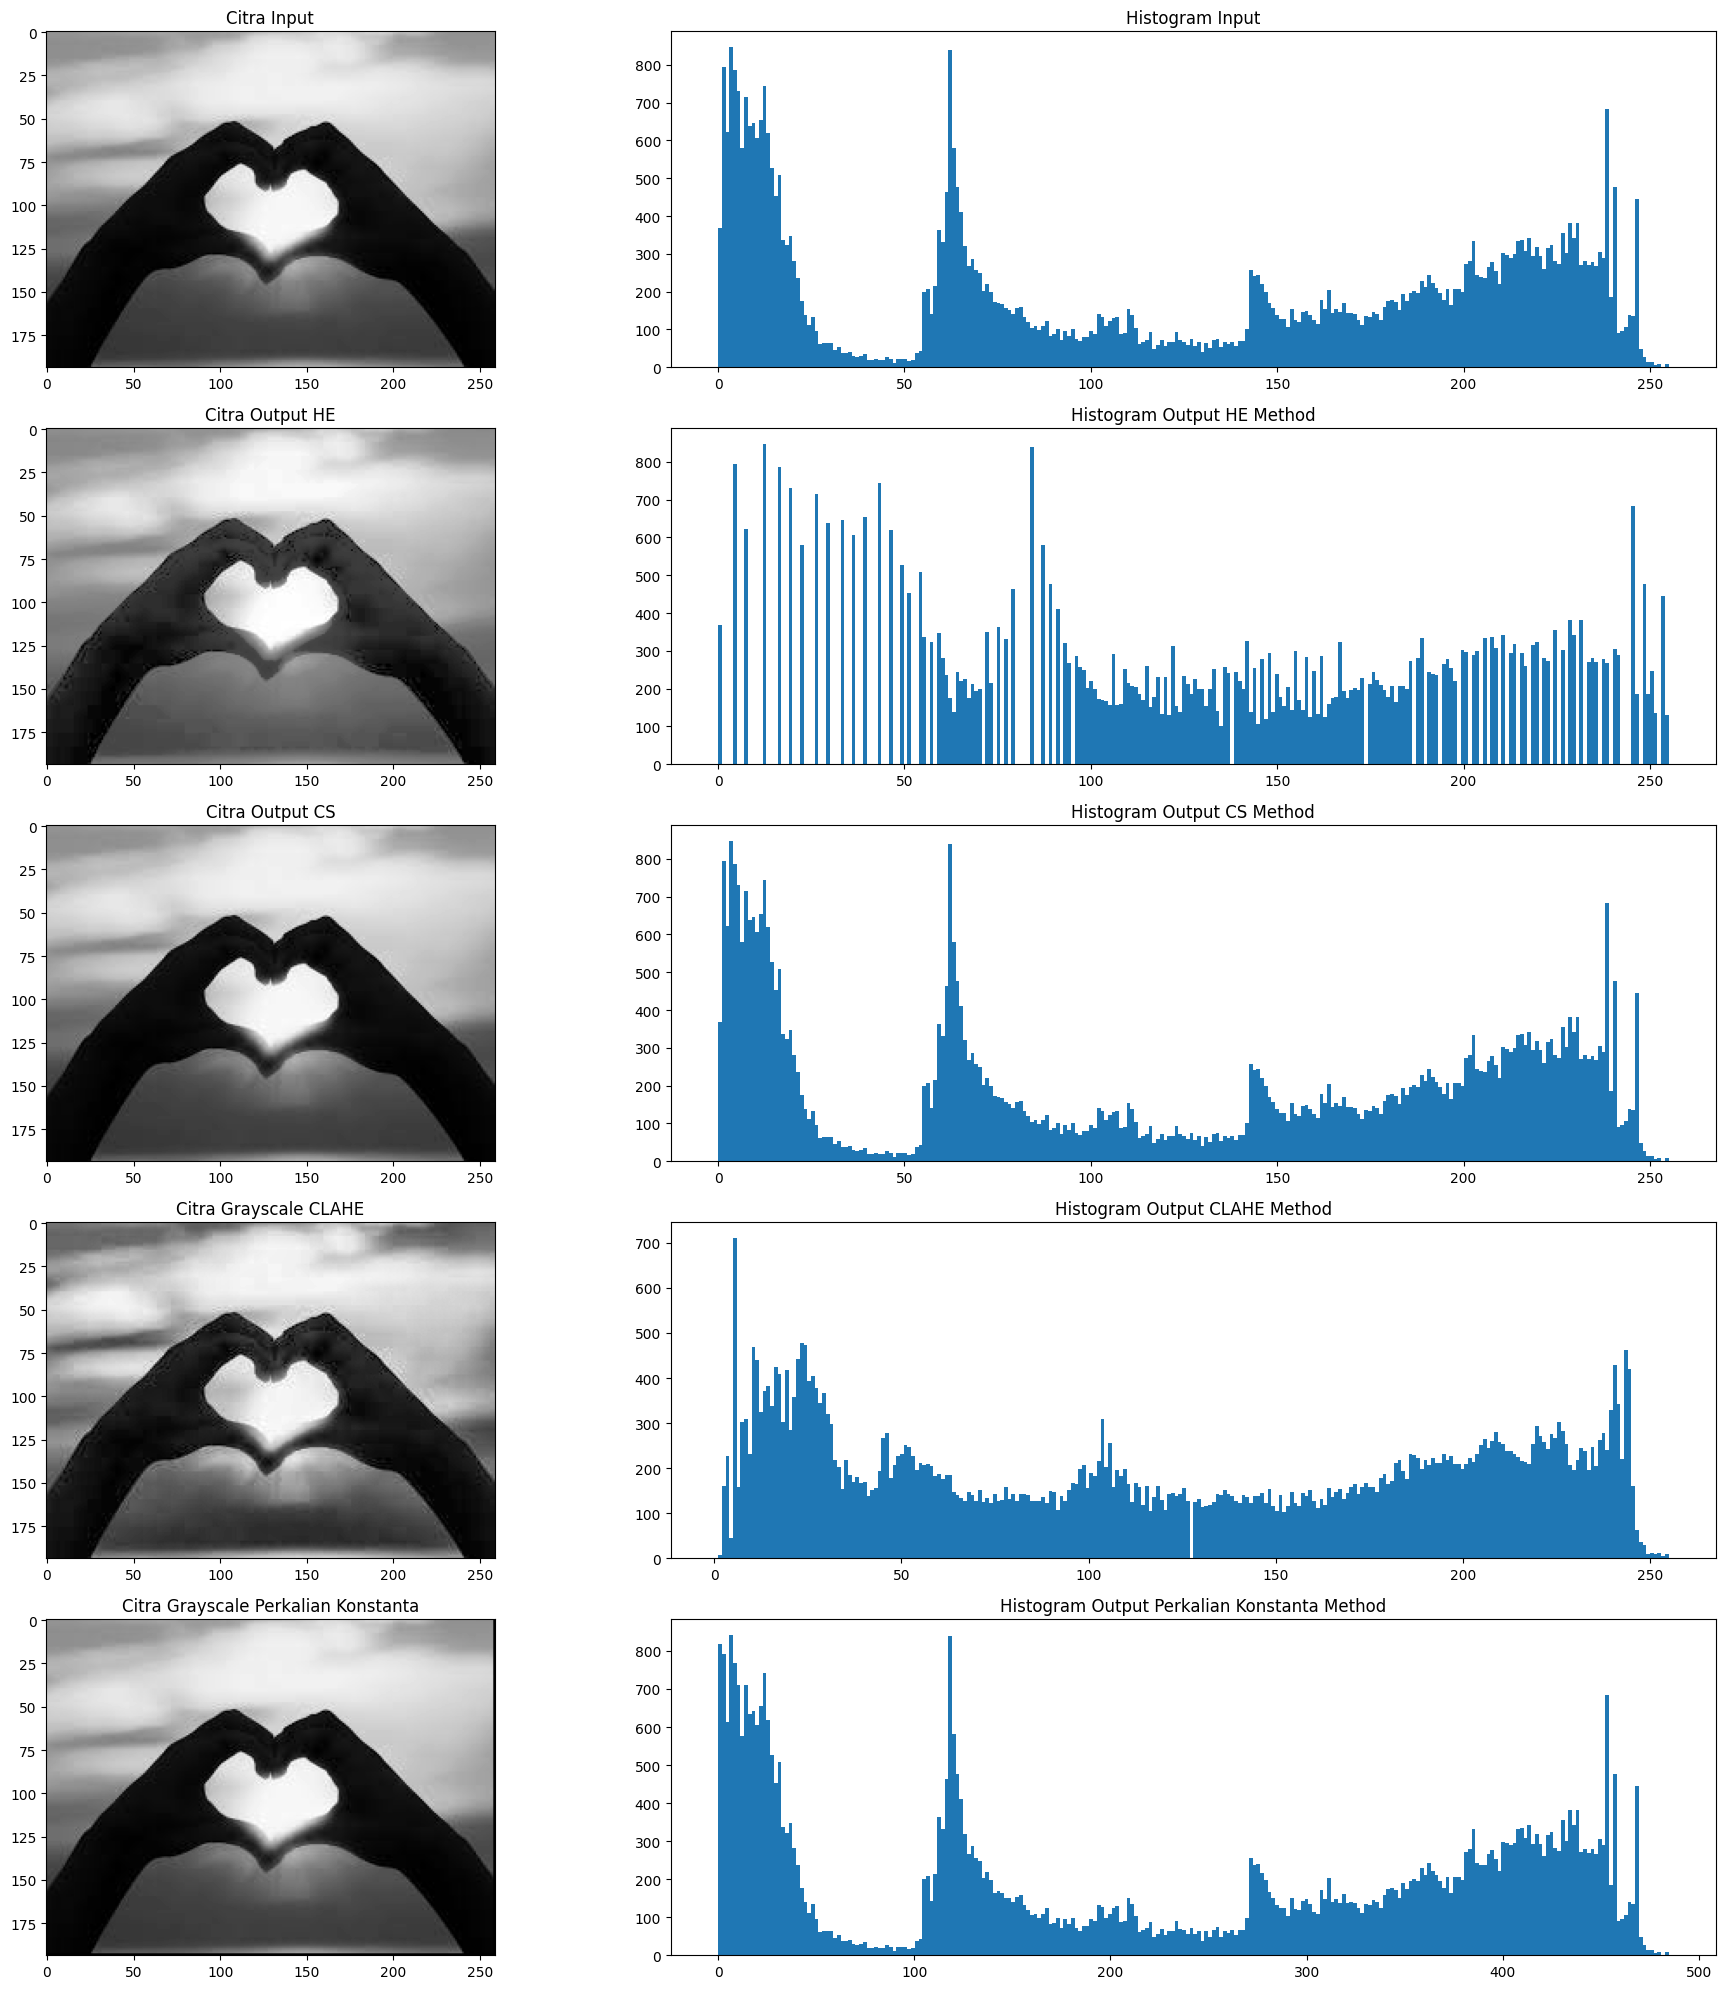

In [2]:
image_path = "one.jpg" # untuk memuat gambar
image = cv2.imread(image_path, 0) # untuk memuat gambar dari image path, dalam sekala keabuan
image_equalized = cv2.equalizeHist(image) # untuk menggunakan fungsi equalisasi histogram
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) # untuk membuat objek CLAHE

#Apply CLAHE to the original image
image_clahe = clahe.apply(image) # megaplisan metode CLAHE pada gambar asli
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') # untuk membuat array baru yg kosong

# Apply Min-Max Contrasting
min = np.min(image) # menhitung nilai piksel terkecil
max = np.max(image) # Menghitung nilai piksel terbesar

for i in range(image.shape[0]): # melakukan iterasi setiap piksel menggunakan dua loop
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) # Menghitung dan menetapkan nilai kontras yang telah ditingkatkan ke setiap piksel dalam array
copyCamera = image.copy().astype(float) # memebuat salinan gambar dan mengubah tipe gambar float

m1,n1 = copyCamera.shape # untuk mendapatkan dimensi gambar salinan
output1 = np.empty([m1, n1]) # membuat array kosong dengan dimensi gambar salinan

for baris in range(0, m1-1): # melakukan iterasi setiap piksel menggunakan dua loop
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9 # mengalikan nilai setiap piksel dan menyimpannya ke dalam array
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) # membuat sebuah figure dengan ukuran 20x20 dan ukuran axes 5x2
ax = axes.ravel() # untuk mengubah array multidimensi menjadi array satu dimensi

# Menampilkan citra input dan histogram input
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

# Menampilkan citra output hasil equalisasi dan histogramnya
ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

# Menampilkan citra output hasil kontras stretching dan histogramnya
ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

# Menampilkan citra output hasil CLAHE dan histogramnya
ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

# Menampilkan citra output hasil perkalian konstanta dan histogramnya
ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout() # untuk mengatur tata letak